# **NUMCS** 



### **Introduction:**

NumCS or Numerical Methods is widely used in todays research. From Physics, to simulation numerical evaluation is a vital task or sometimes even challenge.
Math is nice and on paper everything (that can be solved) has a set of rules, that when followed correctly calculate the correct solution. Integrals, Derivatives, Interpolation are some examples of such computations. But Mathematical Numbers as we know them, are not equiavalent to the set of Machine Numbers. There are rounding errors that can occur either via cancellation or via overflow/underflow when operating with Machine Numbers. The goal of this lecture is to efficiently and correctly implement vital Mathematical Concepts in the world of Machine Numbers. The language of the implementetion is Python and common package used throughout is the numpy package. 

### **Chapter 0 - Differentials**

An example where cancelletion can take place is when evaluating differentialquotient: 

 ![Cancelation](Images/Chapter0-Cancelation.png)

 The code below shows a convergance at the start but then the relative error starts growing.

In [3]:
from numpy import exp, sin, cos

f = exp; df = exp; x = 0
print(f.__name__, x)
h= 0.1
for k in range (1,21):
    ndf = (f(x+h)- f(x))/h
    print(
        "relative error: ", abs((ndf-df(x)/df(x)))
    )
    h*= 0.1


exp 0
relative error:  0.051709180756477124
relative error:  0.005016708416794691
relative error:  0.0005001667083843753
relative error:  5.000166714075327e-05
relative error:  5.0000069644617895e-06
relative error:  4.99962183209135e-07
relative error:  4.943367981624647e-08
relative error:  6.077471526033662e-09
relative error:  8.274037055500116e-08
relative error:  8.274037055500116e-08
relative error:  8.274037033295656e-08
relative error:  8.890058234034548e-05
relative error:  0.0007992778373597798
relative error:  0.0007992778373598908
relative error:  0.11022302462515565
relative error:  1.0
relative error:  1.0
relative error:  1.0
relative error:  1.0
relative error:  1.0


To avoid such cancelation  we can use the imaginary step to with ih Complex and we assume that the funktion f is smooth around x0. So f can be written as a sum of a Power Series that converges around x0:

![PowerSeries](Images/Chapter0-PowerSeries.png)

Now f is endlessly differentiable by using Taylot expansion we can approximate f(x0 + ih)

![Imaginary1](Images/Chapter0-Imaginary1.png)

![Imaginary2](Images/Chapter0-Imaginary2.png)

diffd1
arctan
Relativer Fehler:
[2.07866408e-01 1.13646244e-01 5.94612021e-02 3.04131270e-02
 1.53796939e-02 7.73341104e-03 3.87762954e-03 1.94154975e-03
 9.71459110e-04 4.85900674e-04 2.42993124e-04 1.21507259e-04
 6.07563042e-05 3.03788197e-05 1.51895770e-05 7.59482296e-06
 3.79743389e-06 1.89869112e-06 9.49400128e-07 4.74593835e-07
 2.37126369e-07 1.18263997e-07 5.96046448e-08 3.07895243e-08
 1.02072954e-08 1.02072954e-08 6.25848770e-09 6.25848770e-09
 7.21216202e-08 5.96046448e-08 5.96046448e-08 4.67300415e-07
 4.67300415e-07 2.57492065e-06 1.64031982e-06 6.79016113e-06
 1.00708008e-05 1.00708008e-05 5.73730469e-05 5.73730469e-05
 3.27148437e-04 3.27148437e-04 7.51953125e-04 1.40625000e-03
 1.40625000e-03 1.40625000e-03 1.40625000e-03 3.59375000e-02
 3.31250000e-02 1.05000000e-01 1.05000000e-01 1.05000000e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
-----------
diffih
arctan
Relativer Fehler:
[4.65704

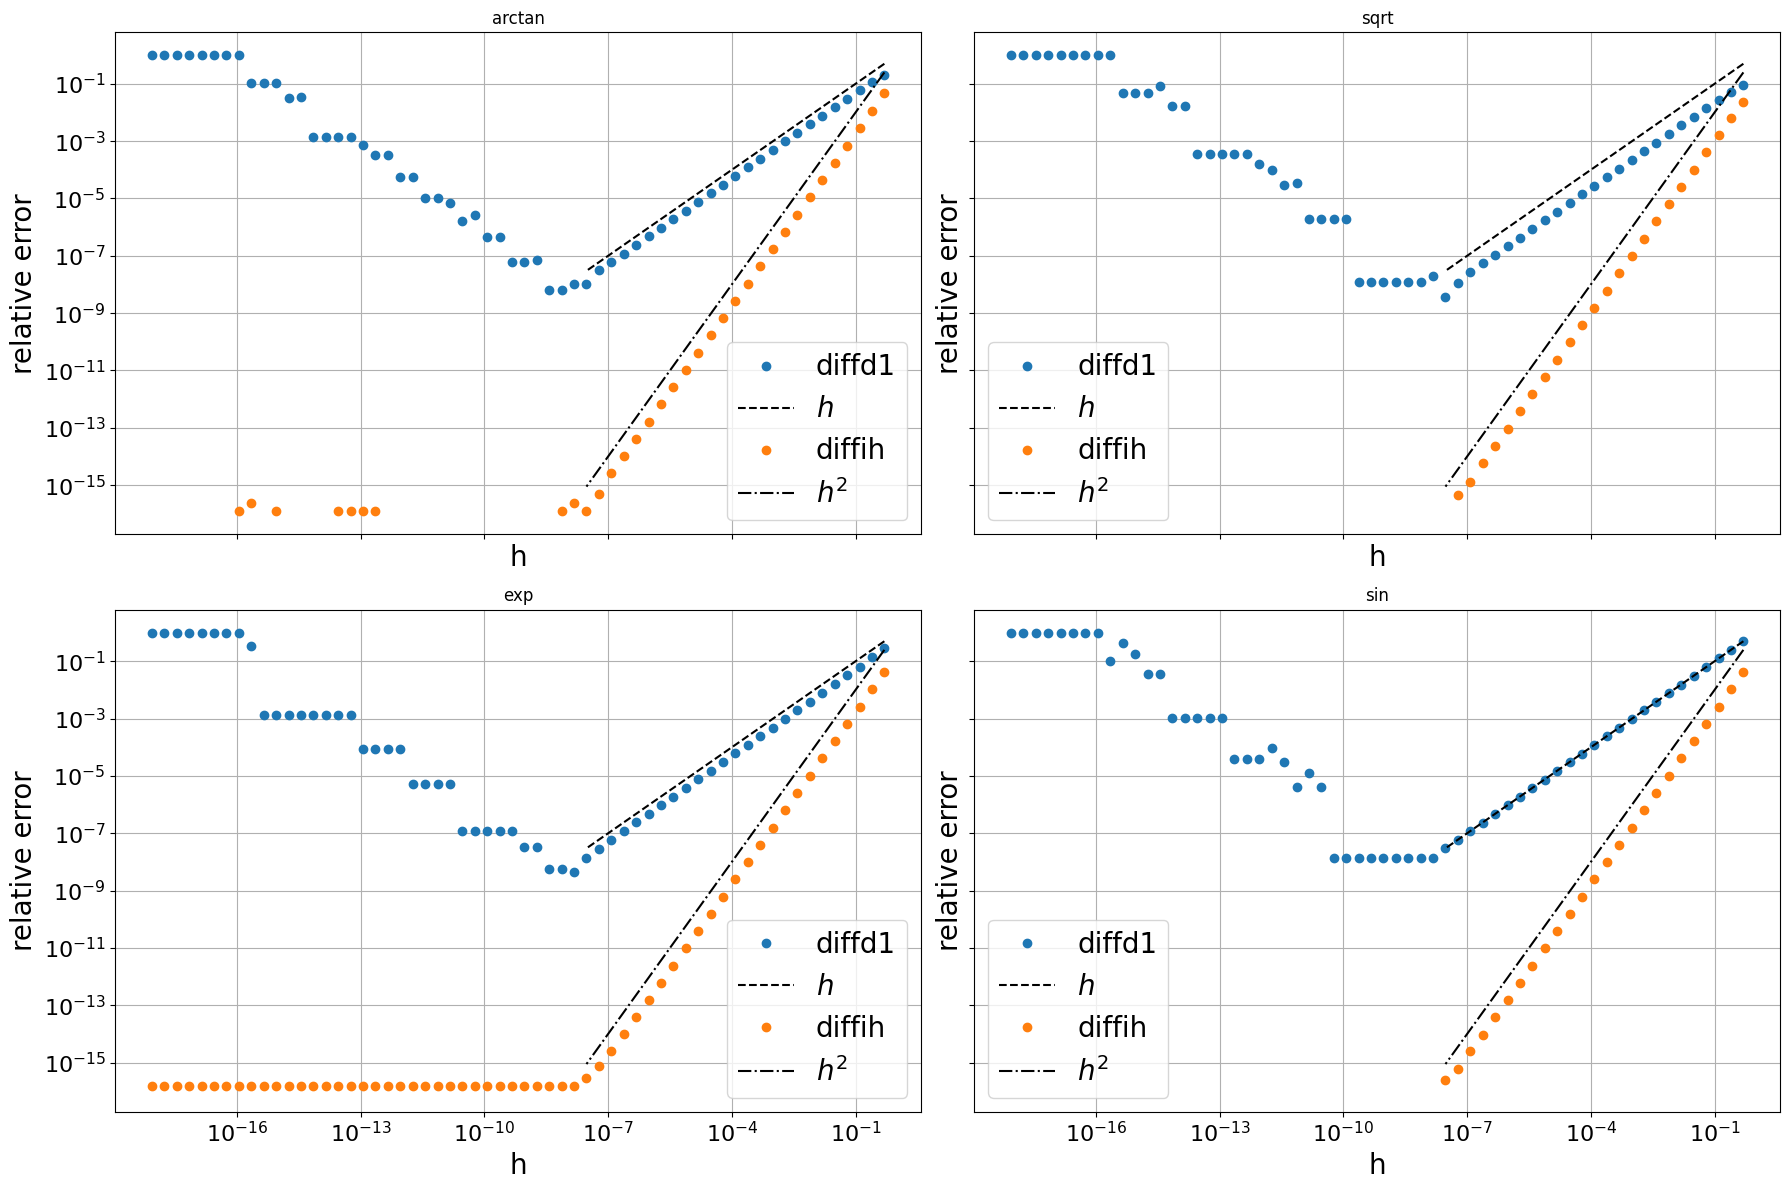

In [ ]:
%matplotlib inline
import numpy as np

# def of dv
def diffd1(f,x, h0):
    nit = 60 # max depth of iterations
    h = np.zeros(nit); h[0] = h0 # width of diff. quot
    y = np.zeros(nit)
    y[0] = ( f(x+h[0]) - f(x) )/h[0]
    for k in range(1,nit):
        h[k] = h[k-1]*0.5
        y[k] = ( f(x+h[k]) - f(x) )/h[k]
    return y, h
    
# complex imaginary step
def diffih(f,x, h0):
    nit = 60 # max depth of iterations
    h = np.zeros(nit); h[0] = h0 # width of diff. quot
    y = np.zeros(nit)
    y[0] = np.imag( f(x+1.j*h[0]) )/h[0]
    for k in range(1,nit):
        h[k] = h[k-1]*0.5 #h gets decreased by half each iteration
        y[k] = np.imag( f(x+1j*h[k]) )/h[k]
    return y, h

# printing routine
def prnt(pname,f,df,x,h0, ax):
    print(f.__name__)
    z,h = pname(f, x, h0)
    rerr = abs(z - df(x)) / df(x)
    ax.loglog(h,rerr, '.', label=pname.__name__)
    kt = 25
    if pname.__name__ == 'diffd1':
        ax.loglog(h[:kt], h[:kt], 'k--', label='$h$')
    else:
        ax.loglog(h[:kt], h[:kt]**2, 'k-.', label='$h^2$')
    print('Relativer Fehler:')
    print(  rerr )
    print('-----------')
    

x = 1.1 # where to evaluate
h0 = 0.5 # staring step

datan = lambda x: 1/(1+x**2)
dsqrt = lambda x: 0.5*x**-0.5
dcos = lambda x: -np.sin(x)

lof = [np.arctan, np.sqrt, np.exp, np.sin]#, np.cos]
lod = [datan, dsqrt, np.exp, np.cos]#, dcos]

from matplotlib import pyplot as plt
params = {'axes.labelsize': 20,
          'figure.figsize' : (18,12),
          #'text.fontsize': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 16,
          'lines.markersize'  : 12,
          'ytick.labelsize': 16#,
          #'text.usetex': True
          }
plt.rcParams.update(params)


fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
axsp = axs.flatten()
for f, df, ax in zip (lof,lod, axsp):
    print('diffd1')
    prnt(diffd1,f,df,x,h0,ax)
    print('diffih')
    prnt(diffih,f,df,x,h0,ax)
    ax.grid(True, which="both")
    ax.set_xlabel('h')
    ax.set_ylabel('relative error')
    ax.set_title(f.__name__)
    ax.legend()
    fig.tight_layout()

plt.show()



##### **Richardson Acceleration**

Another way to avoid cancelation is to use a Method that converges faster so that there is no case where cancelation can occur.

The idea is that we can approxiamate the derivative faster and faster with d(h). By letting halving h and ubstracting the old d(h) we get a faster convergence of the error.

![Richardson1](Images/Chapter0-Richardson1.png)
![Richardson2](Images/Chapter0-Richardson2.png)
![Richardson3](Images/Chapter0-Richardson3.png)
![Richardson4](Images/Chapter0-Richardson4.png)

Then by defining d1(h) = to the last equation we can keep on repeating this process.

![Richardson5](Images/Chapter0-Richardson5.png)

So we can build the follwing Richardson Schema for computing the derivative:


![Richardson6](Images/Chapter0-Richardson6.png)
![Richardson7](Images/Chapter0-Richardson7.png)


diffd2:
arctan
Relativer Fehler:
[4.26282997e-02 1.10903127e-02 2.79679012e-03 7.00663879e-04
 1.75256877e-04 4.38198894e-05 1.09553265e-05 2.73885379e-06
 6.84714843e-07 1.71178747e-07 4.27947077e-08 1.06990433e-08
 2.67468749e-09 6.68724164e-10 1.68238325e-10 4.36193609e-11
 3.41969508e-12 1.94995614e-11 4.48199039e-11 8.38190267e-11
 8.38190267e-11 8.38190267e-11 8.38190267e-11 8.38190267e-11
 2.14204192e-09 1.97440386e-09 6.25848770e-09 6.25848770e-09
 6.25848770e-09 5.96046448e-08 5.96046448e-08 5.96046448e-08
 4.67300415e-07 4.67300415e-07 1.64031982e-06 1.64031982e-06
 1.00708008e-05 1.00708008e-05 1.00708008e-05 5.73730469e-05
 5.73730469e-05 3.27148437e-04 7.51953125e-04 1.40625000e-03
 1.40625000e-03 1.40625000e-03 1.40625000e-03 1.40625000e-03
 3.31250000e-02 3.31250000e-02 1.05000000e-01 1.05000000e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
-----------
diffRichardsonV:
arctan
Relativer Fehle

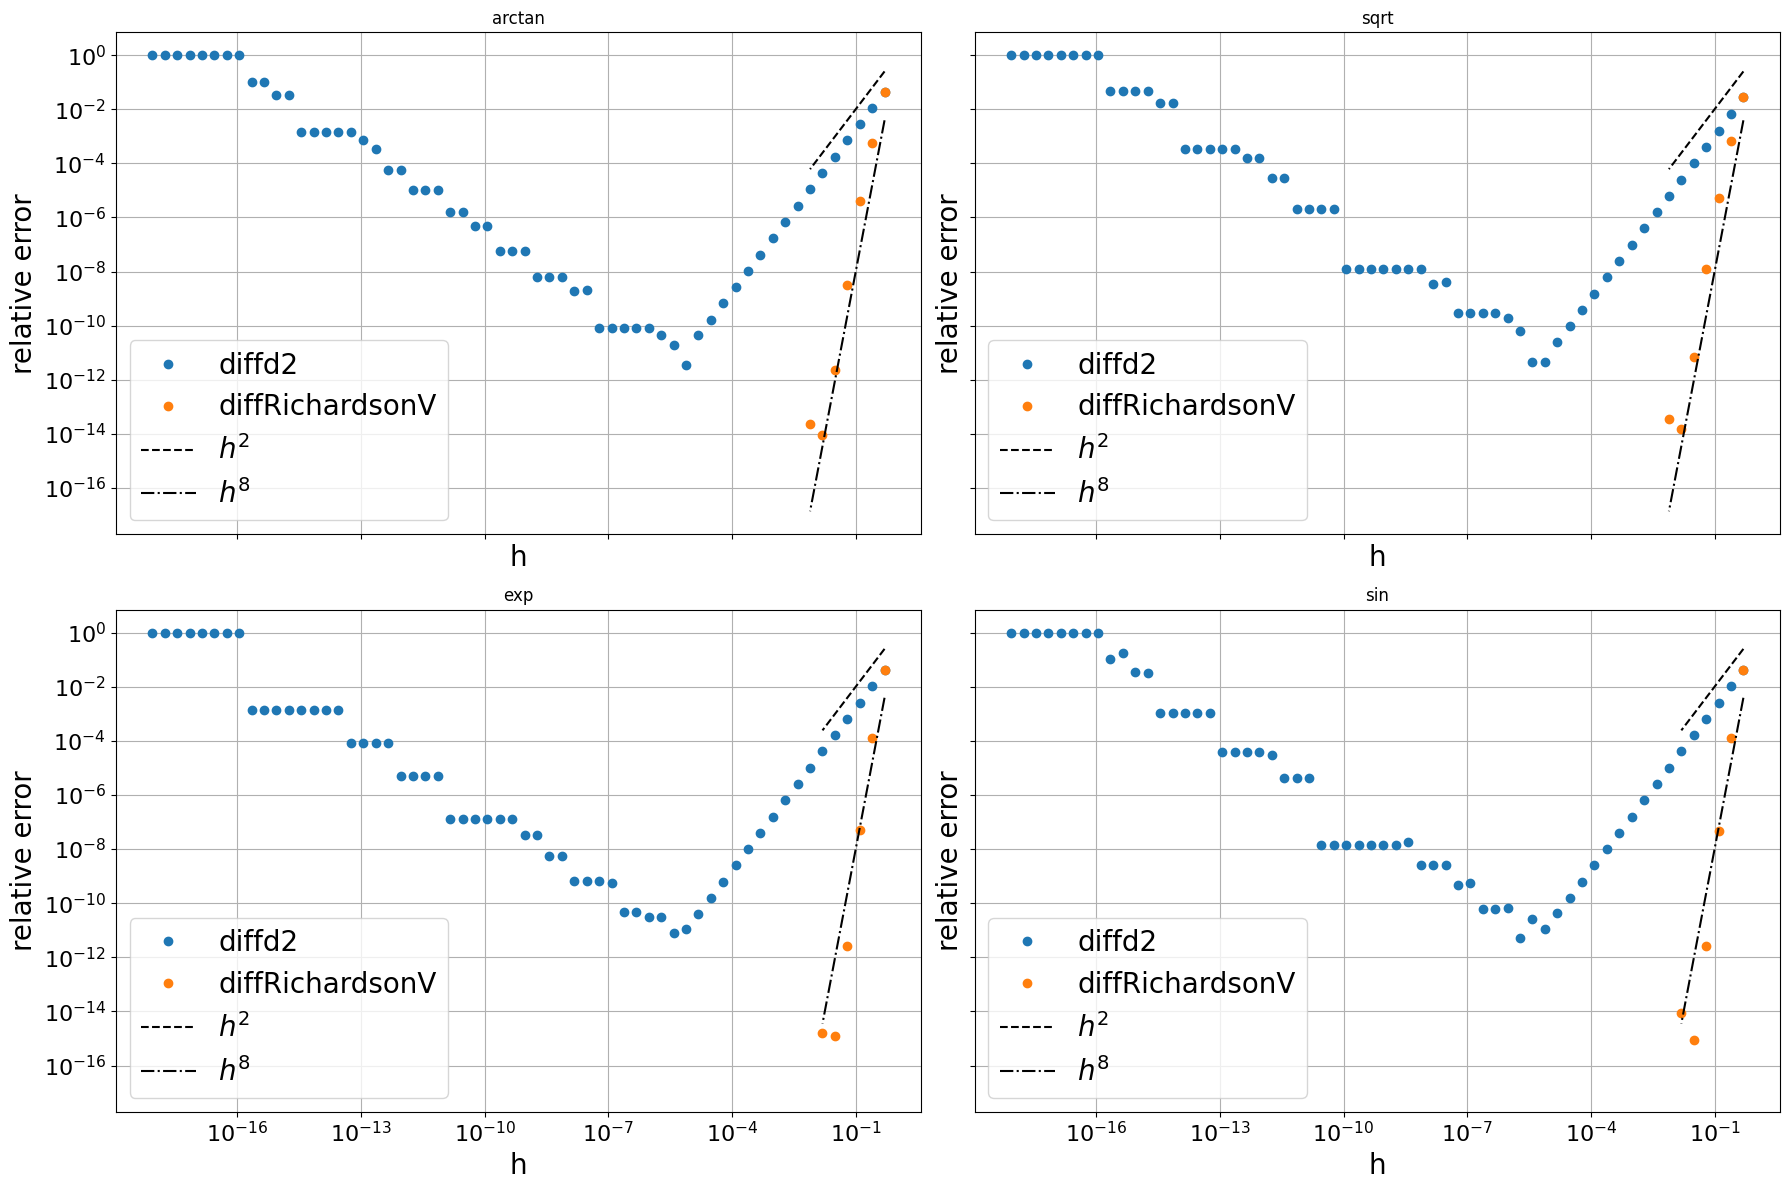

In [8]:
import numpy as np
from matplotlib import pyplot as plt
params = {'axes.labelsize': 20,
          'figure.figsize' : (18,12),
          #'text.fontsize': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 16,
          'lines.markersize'  : 12,
          'ytick.labelsize': 16#,
          #'text.usetex': True
          }
plt.rcParams.update(params)

# standard symmetric divided differences of order 2
def diffd2(f,x, h0):
    nit = 60 # max depth of iterations
    h = h0/2**np.arange(nit)
    fp, fm = f(x+h), f(x-h)
    y = (fp-fm)/2/h
    return y, h
    
    

# Richardson extrapolation; fixed level for vectorisation
def diffRichardsonV(f,x, h0, rtol=1e-12, atol=1e-12):
    nit = 30 # max depth of iterations
    # TODO: implement here the symmetric divided differences of order 2
    h = h0/2**np.arange(nit)
    fp, fm = f(x+h), f(x-h)
    y = (fp-fm)/2/h
    for j in range(1,nit):
      fact = 4**j
      y[j:] = (fact*y[j:]- y[j-1:-1])/(fact-1)
      errest= abs(y[j]-y[j-1])
      if errest < rtol*abs(y[j]) or errest< atol:
        break
      
    return y[:j+1], h[:j+1] # return the last computed io to show cancellation
    
# printing routine
def prnt(pname,f,df,x,h0, ax):
    print(f.__name__)
    z, h = pname(f, x, h0)
    rerr = abs(z - df(x)) / df(x)
    ax.loglog(h,rerr, '.', label=pname.__name__)
    print('Relativer Fehler:')
    print( rerr )
    print('-----------')
    return z,h
    
x = 1.1 # where to evaluate
h0 = 0.5 # staring step

datan = lambda x: 1/(1+x**2)
dsqrt = lambda x: 0.5*x**-0.5
dcos = lambda x: -np.sin(x)

lof = [np.arctan, np.sqrt, np.exp, np.sin, np.cos]
lod = [datan, dsqrt, np.exp, np.cos, dcos]

fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
axsp = axs.flatten()

for f, df, ax in zip (lof,lod, axsp):
    print('diffd2:')
    prnt(diffd2,f,df,x,h0,ax)
    print('diffRichardsonV:')
    z, h = prnt(diffRichardsonV,f,df,x,h0,ax)
    # one more to get the h
    ax.loglog(h,h**2, 'k--', label='$h^2$')
    ax.loglog(h,h**8, 'k-.', label='$h^8$')
    ax.grid(True, which="both")
    ax.set_xlabel('h')
    ax.set_ylabel('relative error')
    ax.set_title(f.__name__)
    ax.legend()
    
fig.tight_layout()
plt.show()

 #### **Python Various**

Short Intro do Numpy, Vectorization and useful python tips.


In [ ]:

x = np.arange(10) # 0,1,2..
print(x[0], x[-1], x[-2]) # 0, 9,8
print(x.reshape(2,5)) # copy with 2 rows and 5 values per row
print(x) # no change
x.shape = (2,5) 
print(x) # changed!
print(x[0]) # not returns an entire row of x since reshaped!
x[0][2] = -2; print(x) # chnaged since x[0] returns view not copy
x[0,2] = -1 # same as above, more efficient
# Types are important!
x[0, 2] = 2.5; print(x[0,2]) # downcast to int thus to 2

y = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print([y[1:7:1]]) #([1, 3, 5]) # prints 1 to 7 (excluded 7 in jumps of 1)
print(y[-2:10], y[-2:]) # [8, 9]
print(y[-3:3:-1]) # starts 7 and goes until 3 backwards 7,6,5,4
print(y[2],y[2:3]) # number vs slice of array

print(x[1:10:5, ::-1])
obj = (slice(1, 10, 5), slice(None, None, -1)); print(x[obj])

x = np.array([[[1],[2],[3]], [[4],[5],[6]]])
print(x[:, np.newaxis, :, :].shape) # is synomim to:
print(x[:, None, :, :].shape)

x = np.arange(10, 1, -1); print(x)

y = np.arange(35).reshape(5, 7); print(y)
print(y[np.array([0, 2, 4]), np.array([0, 1, 2])]) # rows 0,2 ,4 indexed at columns 0,1,2 respectively.
print(y[np.array([0, 2, 4]), 1] ) # elements [0,1], [2,1], [4,1]
print(y[np.array([0, 2, 4])]) # copies of the rows 0,2,4 of y

x = np.arange(12).reshape(4,3); print(x)
rows = np.array([[0,0], [3,3]])
cols = np.array([[0,2], [0,2]])

print( x[rows, cols] )
# shorter via broadcasting:
rows = np.array([0, 3])
cols = np.array([0, 2])

print( rows[:, np.newaxis] )
print( x[rows[:, np.newaxis], cols] )

print( x[np.ix_(rows, cols)] )
print( np.ix_(rows, cols) )

0 9 8
[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4]
[[ 0  1 -2  3  4]
 [ 5  6  7  8  9]]
2
[array([1, 2, 3, 4, 5, 6])]
[8 9] [8 9]
[7 6 5 4]
2 [2]
[[9 8 7 6 5]]
[[9 8 7 6 5]]
(2, 1, 3, 1)
(2, 1, 3, 1)
[10  9  8  7  6  5  4  3  2]
[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]]
[ 0 15 30]
[ 1 15 29]
[[ 0  1  2  3  4  5  6]
 [14 15 16 17 18 19 20]
 [28 29 30 31 32 33 34]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  2]
 [ 9 11]]
[[0]
 [3]]
[[ 0  2]
 [ 9 11]]


#### **Skalarproducts, Kron, Einsum**


In [42]:
a= np.array([1.,2.,3.])
b= np.array([4.j,5.j,6.j])
print(a*b)
print(np.tensordot(b, a, axes=1))

print(np.outer(b,a)) # bxa matrix
print(np.outer(b.conj(),a))

print(np.tensordot(b, a, axes = -1)) # tensor product of b and a
print(np.tensordot(b.conj(), a, axes = -1)) # tensor product

print( np.einsum('i,i',b,a) ) # np.dot(b,a)
print( np.einsum('i,j',b,a) ) # outer product
print( np.einsum('i,i->i',b,a) ) # b*a

A, B = np.array([[1,2],[3,4]]), np.array([[10,11],[12,13]])
print(A, B)
print( np.outer(A,B) )
print( np.kron(A,B) ) # Kroneker product
print( np.einsum('ij,kl->ikjl',A,B).reshape(4,4) ) # Kroneker product
print( np.einsum('ik,kj->ij',A,B) ) # A @ B
print( np.einsum('ik,kj->ji',A,B) ) # (A @ B).T
print( np.einsum('ii->i',A) ) # diag(A)
print( np.einsum('ii->',A) ) # trace(A)
x = np.array([-1., -2.])
print( np.einsum('ij,j->i',A,x) ) # A @ x
print( np.einsum('i,ij->j',x,A) ) # x.dot(A)
print( np.einsum('s,st,t->',x,A,x) ) # x.dot(A @ x) quadratic form

[0. +4.j 0.+10.j 0.+18.j]
32j
[[0. +4.j 0. +8.j 0.+12.j]
 [0. +5.j 0.+10.j 0.+15.j]
 [0. +6.j 0.+12.j 0.+18.j]]
[[0. -4.j 0. -8.j 0.-12.j]
 [0. -5.j 0.-10.j 0.-15.j]
 [0. -6.j 0.-12.j 0.-18.j]]
[[0. +4.j 0. +8.j 0.+12.j]
 [0. +5.j 0.+10.j 0.+15.j]
 [0. +6.j 0.+12.j 0.+18.j]]
[[0. -4.j 0. -8.j 0.-12.j]
 [0. -5.j 0.-10.j 0.-15.j]
 [0. -6.j 0.-12.j 0.-18.j]]
32j
[[0. +4.j 0. +8.j 0.+12.j]
 [0. +5.j 0.+10.j 0.+15.j]
 [0. +6.j 0.+12.j 0.+18.j]]
[0. +4.j 0.+10.j 0.+18.j]
[[1 2]
 [3 4]] [[10 11]
 [12 13]]
[[10 11 12 13]
 [20 22 24 26]
 [30 33 36 39]
 [40 44 48 52]]
[[10 11 20 22]
 [12 13 24 26]
 [30 33 40 44]
 [36 39 48 52]]
[[10 11 20 22]
 [12 13 24 26]
 [30 33 40 44]
 [36 39 48 52]]
[[34 37]
 [78 85]]
[[34 78]
 [37 85]]
[1 4]
5
[ -5. -11.]
[ -7. -10.]
27.0
